In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from sklearn.utils import class_weight
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
from keras.callbacks import Callback
import keras.backend as K
import random
import tensorflow_addons as tfa
import math
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import GlorotUniform
import seaborn as sns


Load Data

In [2]:
X_class = np.load('/home/anibalpires4/Desktop/ML/class2/Xtrain_Classification2.npy')
Y_class = np.load('/home/anibalpires4/Desktop/ML/class2/ytrain_Classification2.npy')
N = len(X_class)
X_class = (X_class).astype('float32')/255.0
X_class = X_class.reshape(X_class.shape[0],28,28,3)

#Split data
X_train, X_val, Y_train, Y_val = train_test_split(X_class, Y_class, test_size=0.2, stratify=Y_class, random_state=42)


# Define indexes for class 1 and class 2
indexes_class0 = [x for x in range(len(Y_train)) if Y_train[x] == 0]
indexes_class1 = [x for x in range(len(Y_train)) if Y_train[x] == 1]
indexes_class2 = [x for x in range(len(Y_train)) if Y_train[x] == 2]
indexes_class3 = [x for x in range(len(Y_train)) if Y_train[x] == 3]
indexes_class4 = [x for x in range(len(Y_train)) if Y_train[x] == 4]
indexes_class5 = [x for x in range(len(Y_train)) if Y_train[x] == 5]

# Randomly select the number of samples from each class
#indexes_class1 = random.sample(indexes_class1, 712)
#indexes_class2 = random.sample(indexes_class2, 93)


# Store the shapes before augmentation
shape_class0_before = len(indexes_class0)
shape_class1_before = len(indexes_class1)
shape_class2_before = len(indexes_class2)
shape_class3_before = len(indexes_class3)
shape_class4_before = len(indexes_class4)
shape_class5_before = len(indexes_class5)

def augment_image(image):
    # Flip from left to right
    image_1 = tf.image.flip_left_right(image)

    # Flip up and down
    image_2 = tf.image.flip_up_down(image)

    # Rotate 90 degrees
    image_3 = tf.image.rot90(image, k=1)

    # Rotate 270 degrees
    image_4 = tf.image.rot90(image, k=3)

    # Transpose
    image_5 = tf.image.transpose(image, name=None)

    # Aplying contrast
    image_6 = tf.image.adjust_contrast(image, contrast_factor=1.5)

    image_7 = tf.image.adjust_saturation(image, saturation_factor=1.5)

    #image_8 = tf.image.adjust_gamma(image, gamma= 2, gain=1)

    return image_1, image_2, image_3, image_4, image_5, image_6, image_7


for i in indexes_class1:
    image = X_train[i]
    augmented_images = augment_image(image)[0:5]
    
    for augmented_image in augmented_images:
        augmented_image = augmented_image.numpy()
        augmented_image = augmented_image.reshape(1, 28, 28, 3)
        X_train = np.append(X_train, augmented_image, axis=0)
        Y_train = np.append(Y_train, 1)

for i in indexes_class2:
    image = X_train[i]
    augmented_images = augment_image(image)
    
    for augmented_image in augmented_images:
        augmented_image = augmented_image.numpy()
        augmented_image = augmented_image.reshape(1, 28, 28, 3)
        X_train = np.append(X_train, augmented_image, axis=0)
        Y_train = np.append(Y_train, 2)

for i in indexes_class3:
    image = X_train[i]
    image = augment_image(image)[0]  
    image = image.numpy()
    image = image.reshape(1, 28, 28, 3)
    X_train = np.append(X_train, image, axis=0)
    Y_train = np.append(Y_train, 3)

for i in indexes_class4:
    image = X_train[i]
    augmented_images = augment_image(image)[0:3]
    
    for augmented_image in augmented_images:
        augmented_image = augmented_image.numpy()
        augmented_image = augmented_image.reshape(1, 28, 28, 3)
        X_train = np.append(X_train, augmented_image, axis=0)
        Y_train = np.append(Y_train, 4)

for i in indexes_class5:
    image = X_train[i]
    augmented_images = augment_image(image)[0:3]
    
    for augmented_image in augmented_images:
        augmented_image = augmented_image.numpy()
        augmented_image = augmented_image.reshape(1, 28, 28, 3)
        X_train = np.append(X_train, augmented_image, axis=0)
        Y_train = np.append(Y_train, 5)

# Store the shapes after augmentation
shape_class1_after = len([x for x in range(len(Y_train)) if Y_train[x] == 1])
shape_class2_after = len([x for x in range(len(Y_train)) if Y_train[x] == 2])
shape_class3_after = len([x for x in range(len(Y_train)) if Y_train[x] == 3])
shape_class4_after = len([x for x in range(len(Y_train)) if Y_train[x] == 4])
shape_class5_after = len([x for x in range(len(Y_train)) if Y_train[x] == 5])

# Print the shapes before and after rotation
print("Shape of Y_train for Class 0:", shape_class0_before)
print("Shape of Y_train for Class 1 before:", shape_class1_before)
print("Shape of Y_train for Class 2 before:", shape_class2_before)
print("Shape of Y_train for Class 3 before:", shape_class3_before)
print("Shape of Y_train for Class 4 before:", shape_class4_before)
print("Shape of Y_train for Class 5 before:", shape_class5_before)
print("Shape of Y_train for Class 1 after:", shape_class1_after)
print("Shape of Y_train for Class 2 after:", shape_class2_after)
print("Shape of Y_train for Class 3 after:", shape_class3_after)
print("Shape of Y_train for Class 4 after:", shape_class4_after)
print("Shape of Y_train for Class 5 after:", shape_class5_after)




seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

class_weights = dict(zip(np.unique(Y_train), class_weight.compute_class_weight(class_weight = "balanced", classes= np.unique(Y_train), y= Y_train))) 




Shape of Y_train for Class 0: 4289
Shape of Y_train for Class 1 before: 712
Shape of Y_train for Class 2 before: 93
Shape of Y_train for Class 3 before: 1844
Shape of Y_train for Class 4 before: 792
Shape of Y_train for Class 5 before: 773
Shape of Y_train for Class 1 after: 4272
Shape of Y_train for Class 2 after: 744
Shape of Y_train for Class 3 after: 3688
Shape of Y_train for Class 4 after: 3168
Shape of Y_train for Class 5 after: 3092


CNN

In [3]:
# Define the number of classes
num_classes = 6

custom_initializer = GlorotUniform(seed=seed)

# Define a simpler model with L2 regularization and Batch Normalization
model = Sequential([
    layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(28, 28, 3), kernel_regularizer=l2(1e-4), kernel_initializer=custom_initializer),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=l2(1e-4)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

In [4]:
# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

batch_size = 64

history = model.fit(x=X_train, y=Y_train, epochs=100,
                    validation_data=(X_val, Y_val),
                    class_weight=class_weights,
                    steps_per_epoch=len(X_train)//batch_size,
                    callbacks=[early_stopping])




Epoch 1/100
300/300 [==============================] - 14s 42ms/step - loss: 0.9352 - accuracy: 0.6490 - val_loss: 1.2742 - val_accuracy: 0.5564
Epoch 2/100
300/300 [==============================] - 11s 38ms/step - loss: 0.6022 - accuracy: 0.7557 - val_loss: 0.5695 - val_accuracy: 0.7808
Epoch 3/100
300/300 [==============================] - 11s 37ms/step - loss: 0.5220 - accuracy: 0.7873 - val_loss: 0.5715 - val_accuracy: 0.7516
Epoch 4/100
300/300 [==============================] - 16s 54ms/step - loss: 0.4702 - accuracy: 0.8038 - val_loss: 0.4740 - val_accuracy: 0.8166
Epoch 5/100
300/300 [==============================] - 26s 85ms/step - loss: 0.4181 - accuracy: 0.8244 - val_loss: 0.4730 - val_accuracy: 0.7921
Epoch 6/100
300/300 [==============================] - 18s 61ms/step - loss: 0.3961 - accuracy: 0.8372 - val_loss: 0.4203 - val_accuracy: 0.8344
Epoch 7/100
300/300 [==============================] - 23s 75ms/step - loss: 0.3687 - accuracy: 0.8455 - val_loss: 0.7030 - val_ac

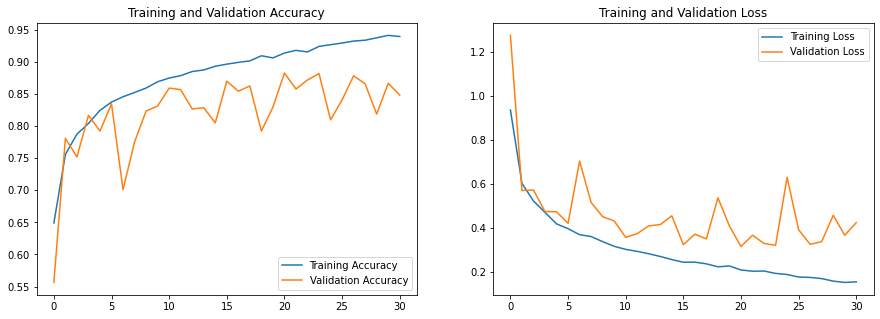

In [5]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [6]:
y_pred_train = model.predict(X_train)
y_pred_train_CNN = np.argmax(y_pred_train, axis=1)

y_pred = model.predict(X_val)
y_pred_CNN = np.argmax(y_pred, axis=1)
balance_accuracy = balanced_accuracy_score(Y_val, y_pred_CNN)

print(balance_accuracy)
print(classification_report(Y_val, y_pred_CNN))
print(confusion_matrix(Y_val, y_pred_CNN))



0.8628216753483695
              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91      1073
         1.0       0.52      0.65      0.57       178
         2.0       0.48      0.87      0.62        23
         3.0       0.96      0.94      0.95       461
         4.0       0.93      0.87      0.90       198
         5.0       0.87      0.97      0.92       193

    accuracy                           0.88      2126
   macro avg       0.78      0.86      0.81      2126
weighted avg       0.90      0.88      0.89      2126

[[949 107  17   0   0   0]
 [ 59 115   4   0   0   0]
 [  2   1  20   0   0   0]
 [  0   0   0 433  11  17]
 [  0   0   1  14 172  11]
 [  0   0   0   4   2 187]]


In [7]:
# Flatten the images
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)

SVM

In [8]:
# Create and train SVM model
SVM = svm.SVC(C=1.5, kernel='rbf', class_weight='balanced')
SVM.fit(X_train, Y_train)

# Make predictions on training data
y_pred_train_SVM = SVM.predict(X_train)

# Make predictions on validation data
y_pred_SVM = SVM.predict(X_val)

# Calculate balanced accuracy
balanced_acc = balanced_accuracy_score(Y_val, y_pred_SVM)
print('Balanced accuracy =', balanced_acc)

# Generate a classification report
class_report = classification_report(Y_val, y_pred_SVM)
print("Classification Report:\n", class_report)

# Generate a confusion matrix
cm = confusion_matrix(Y_val, y_pred_SVM)
print("Confusion Matrix:\n", cm)




Balanced accuracy = 0.8223624827344246
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.70      0.81      1073
         1.0       0.34      0.81      0.48       178
         2.0       0.29      0.87      0.43        23
         3.0       0.88      0.92      0.90       461
         4.0       0.85      0.77      0.81       198
         5.0       0.87      0.86      0.86       193

    accuracy                           0.78      2126
   macro avg       0.70      0.82      0.72      2126
weighted avg       0.87      0.78      0.80      2126

Confusion Matrix:
 [[753 280  40   0   0   0]
 [ 24 145   9   0   0   0]
 [  0   3  20   0   0   0]
 [  0   0   0 422  25  14]
 [  0   0   0  34 153  11]
 [  0   0   0  24   3 166]]


Test set

In [14]:
X_Class = np.load('/home/anibalpires4/Desktop/ML/class2/Xtrain_Classification2.npy')
Y_Class = np.load('/home/anibalpires4/Desktop/ML/class2/ytrain_Classification2.npy')
X_test = np.load('/home/anibalpires4/Desktop/ML/class2/Xtest_Classification2.npy')

In [15]:
print(X_test)
print(X_test.shape)

[[203 161 173 ... 240 209 188]
 [168 135 130 ... 205 171 159]
 [231 154 162 ... 222 145 135]
 ...
 [172 144 132 ... 161 130 128]
 [236 208 205 ... 221 184 178]
 [248 229 199 ... 217 185 170]]
(2658, 2352)


In [16]:
X_Class = (X_Class).astype('float32')/255.0
X_Class = X_Class.reshape(-1, 28, 28, 3)

X_test = (X_test).astype('float32')/255.0
X_test = X_test.reshape(-1, 28, 28, 3)
X_test.shape

(2658, 28, 28, 3)

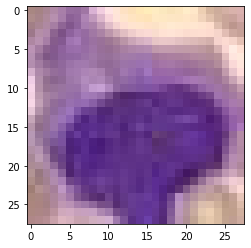

In [17]:
plt.imshow(X_test[1])


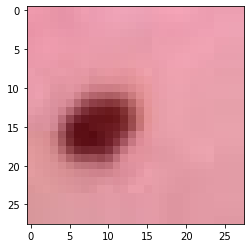

In [18]:
plt.imshow(X_Class[8])

In [19]:
# Define indexes for class 1 and class 2
indexes_class0 = [x for x in range(len(Y_Class)) if Y_Class[x] == 0]
indexes_class1 = [x for x in range(len(Y_Class)) if Y_Class[x] == 1]
indexes_class2 = [x for x in range(len(Y_Class)) if Y_Class[x] == 2]
indexes_class3 = [x for x in range(len(Y_Class)) if Y_Class[x] == 3]
indexes_class4 = [x for x in range(len(Y_Class)) if Y_Class[x] == 4]
indexes_class5 = [x for x in range(len(Y_Class)) if Y_Class[x] == 5]


# Store the shapes before augmentation
shape_class0_before = len(indexes_class0)
shape_class1_before = len(indexes_class1)
shape_class2_before = len(indexes_class2)
shape_class3_before = len(indexes_class3)
shape_class4_before = len(indexes_class4)
shape_class5_before = len(indexes_class5)

for i in indexes_class1:
    image = X_Class[i]
    augmented_images = augment_image(image)[0:5]
    
    for augmented_image in augmented_images:
        augmented_image = augmented_image.numpy()
        augmented_image = augmented_image.reshape(1, 28, 28, 3)
        X_Class = np.append(X_Class, augmented_image, axis=0)
        Y_Class = np.append(Y_Class, 1)

for i in indexes_class2:
    image = X_Class[i]
    augmented_images = augment_image(image)
    
    for augmented_image in augmented_images:
        augmented_image = augmented_image.numpy()
        augmented_image = augmented_image.reshape(1, 28, 28, 3)
        X_Class = np.append(X_Class, augmented_image, axis=0)
        Y_Class = np.append(Y_Class, 2)

for i in indexes_class3:
    image = X_Class[i]
    image = augment_image(image)[0]  
    image = image.numpy()
    image = image.reshape(1, 28, 28, 3)
    X_Class = np.append(X_Class, image, axis=0)
    Y_Class = np.append(Y_Class, 3)

for i in indexes_class4:
    image = X_Class[i]
    augmented_images = augment_image(image)[0:3]
    
    for augmented_image in augmented_images:
        augmented_image = augmented_image.numpy()
        augmented_image = augmented_image.reshape(1, 28, 28, 3)
        X_Class = np.append(X_Class, augmented_image, axis=0)
        Y_Class = np.append(Y_Class, 4)

for i in indexes_class5:
    image = X_Class[i]
    augmented_images = augment_image(image)[0:3]
    
    for augmented_image in augmented_images:
        augmented_image = augmented_image.numpy()
        augmented_image = augmented_image.reshape(1, 28, 28, 3)
        X_Class = np.append(X_Class, augmented_image, axis=0)
        Y_Class = np.append(Y_Class, 5)


In [20]:
# Store the shapes after augmentation
shape_class1_after = len([x for x in range(len(Y_Class)) if Y_Class[x] == 1])
shape_class2_after = len([x for x in range(len(Y_Class)) if Y_Class[x] == 2])
shape_class3_after = len([x for x in range(len(Y_Class)) if Y_Class[x] == 3])
shape_class4_after = len([x for x in range(len(Y_Class)) if Y_Class[x] == 4])
shape_class5_after = len([x for x in range(len(Y_Class)) if Y_Class[x] == 5])

# Print the shapes before and after rotation
print("Shape of Y_train for Class 0:", shape_class0_before)
print("Shape of Y_train for Class 1 before:", shape_class1_before)
print("Shape of Y_train for Class 2 before:", shape_class2_before)
print("Shape of Y_train for Class 3 before:", shape_class3_before)
print("Shape of Y_train for Class 4 before:", shape_class4_before)
print("Shape of Y_train for Class 5 before:", shape_class5_before)
print("Shape of Y_train for Class 1 after:", shape_class1_after)
print("Shape of Y_train for Class 2 after:", shape_class2_after)
print("Shape of Y_train for Class 3 after:", shape_class3_after)
print("Shape of Y_train for Class 4 after:", shape_class4_after)
print("Shape of Y_train for Class 5 after:", shape_class5_after)


_, x_val, _, y_val = train_test_split(X_Class, Y_Class, test_size=0.2, random_state=42)


seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

class_weights = dict(zip(np.unique(Y_Class), class_weight.compute_class_weight(class_weight = "balanced", classes= np.unique(Y_Class), y= Y_Class)))

Shape of Y_train for Class 0: 5362
Shape of Y_train for Class 1 before: 890
Shape of Y_train for Class 2 before: 116
Shape of Y_train for Class 3 before: 2305
Shape of Y_train for Class 4 before: 990
Shape of Y_train for Class 5 before: 966
Shape of Y_train for Class 1 after: 5340
Shape of Y_train for Class 2 after: 928
Shape of Y_train for Class 3 after: 4610
Shape of Y_train for Class 4 after: 3960
Shape of Y_train for Class 5 after: 3864


In [21]:
# Define the number of classes
num_classes = 6

custom_initializer = GlorotUniform(seed=seed)

# Define a simpler model with L2 regularization and Batch Normalization
model = Sequential([
    layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(28, 28, 3), kernel_regularizer=l2(1e-4), kernel_initializer=custom_initializer),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=l2(1e-4)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

In [22]:
# Define early stopping criteria
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

batch_size = 64

history = model.fit(x=X_Class, y=Y_Class, epochs=21,
                    validation_data=(x_val, y_val),
                    class_weight=class_weights,
                    steps_per_epoch=len(X_train)//batch_size)
                    #callbacks=[early_stopping])

Epoch 1/21
300/300 [==============================] - 17s 53ms/step - loss: 0.8903 - accuracy: 0.6663 - val_loss: 2.0985 - val_accuracy: 0.2944
Epoch 2/21
300/300 [==============================] - 27s 91ms/step - loss: 0.5803 - accuracy: 0.7647 - val_loss: 0.5859 - val_accuracy: 0.7559
Epoch 3/21
300/300 [==============================] - 32s 106ms/step - loss: 0.4977 - accuracy: 0.7944 - val_loss: 0.3972 - val_accuracy: 0.8527
Epoch 4/21
300/300 [==============================] - 31s 104ms/step - loss: 0.4385 - accuracy: 0.8187 - val_loss: 0.4436 - val_accuracy: 0.8213
Epoch 5/21
300/300 [==============================] - 32s 105ms/step - loss: 0.4084 - accuracy: 0.8335 - val_loss: 0.3474 - val_accuracy: 0.8731
Epoch 6/21
300/300 [==============================] - 32s 106ms/step - loss: 0.3775 - accuracy: 0.8422 - val_loss: 0.3198 - val_accuracy: 0.8859
Epoch 7/21
300/300 [==============================] - 32s 106ms/step - loss: 0.3557 - accuracy: 0.8533 - val_loss: 0.3645 - val_accu

In [24]:
y_pred = model.predict(x_val)
y_pred_CNN = np.argmax(y_pred, axis=1)
balance_accuracy = balanced_accuracy_score(y_val, y_pred_CNN)

print(balance_accuracy)
print(classification_report(y_val, y_pred_CNN))
print(confusion_matrix(y_val, y_pred_CNN))

0.9428055683212687
              precision    recall  f1-score   support

         0.0       0.94      0.79      0.86      1092
         1.0       0.82      0.94      0.88      1072
         2.0       0.89      0.99      0.94       192
         3.0       0.97      0.99      0.98       903
         4.0       0.97      0.99      0.98       779
         5.0       1.00      0.95      0.97       775

    accuracy                           0.93      4813
   macro avg       0.93      0.94      0.93      4813
weighted avg       0.93      0.93      0.93      4813

[[ 862  217   13    0    0    0]
 [  54 1007   11    0    0    0]
 [   0    1  191    0    0    0]
 [   0    0    0  894    8    1]
 [   0    0    0    5  773    1]
 [   0    0    0   25   13  737]]


X_test prediction

In [25]:
print(X_test.shape)

y_test_prediction = model.predict(X_test)
print(y_test_prediction.shape)

class2_prediction = np.argmax(y_test_prediction, axis = 1)
print(class2_prediction.shape)

np.save('/home/anibalpires4/Desktop/ML/Classification_2/class4_prediction.npy', class2_prediction)

(2658, 28, 28, 3)
(2658, 6)
(2658,)


In [26]:
prediction = np.load('/home/anibalpires4/Desktop/ML/Classification_2/class4_prediction.npy')

In [27]:
idx_0  = np.array(np.where(prediction==0))
idx_1 = np.array(np.where(prediction==1))
idx_2 = np.array(np.where(prediction==2))
idx_3 = np.array(np.where(prediction==3))
idx_4 = np.array(np.where(prediction==4))
idx_5 = np.array(np.where(prediction==5))

n_0 = idx_0.size
n_1 = idx_1.size
n_2 = idx_2.size
n_3 = idx_3.size
n_4 = idx_4.size
n_5 = idx_5.size

print("number of zeros = " + str(n_0))
print("number of ones = " + str(n_1))
print("number of twos = " + str(n_2))
print("number of threes = " + str(n_3))
print("number of fours = " + str(n_4))
print("number of fives = " + str(n_5))

number of zeros = 1054
number of ones = 492
number of twos = 47
number of threes = 584
number of fours = 255
number of fives = 226


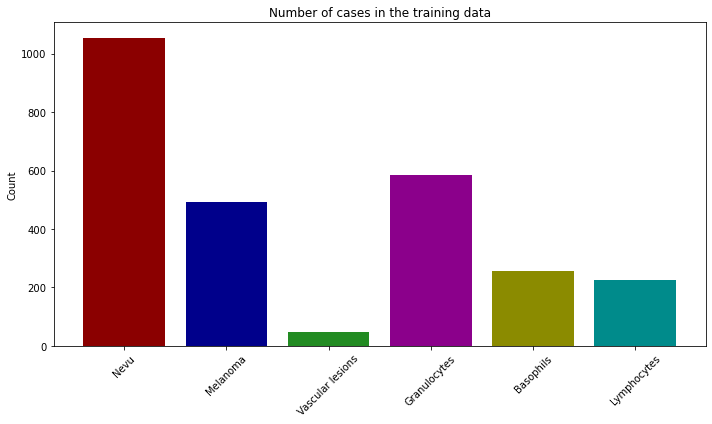

[39.65387509405568, 18.510158013544018, 1.7682468021068474, 21.97140707298721, 9.593679458239277, 8.502633559066968]


In [28]:
# Define categories and corresponding values
categories = ['Nevu', 'Melanoma', 'Vascular lesions', 'Granulocytes', 'Basophils', 'Lymphocytes']
values = [n_0, n_1, n_2, n_3, n_4, n_5]

colors = ['#8B0000', '#00008B', '#228B22', '#8B008B', '#8B8B00', '#008B8B'] 

plt.figure(figsize=(10, 6))  

# Create the bar plot
plt.bar(categories, values, color=colors)
plt.ylabel('Count')
plt.title('Number of cases in the training data')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout() 
plt.show()

# Calculate the total count
total_count = sum(values)

# Calculate the percentages for each category
percentages = [(count / total_count) * 100 for count in values]
print(percentages)